In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

In [2]:
def find_fraction_of_good_Ev( sample=None, good_percentage=15 ):
    Ngood = len(sample[np.abs(sample)<good_percentage])
    fgood = float(Ngood) / len(sample)
    print "%.1f"%(100.*fgood),'% with ratio<',good_percentage,'%'
    return fgood

# 7 Reconstruction of the incoming Eν for the selected events
Aug 30, 2017

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/EvReconstruction/'

# pairs of tracks at close proximity

In [4]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic()
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

28757 pairs from MC-BNB + cosmic DATA overlay
18979 pairs in FV
5094 are 1mu-1p, 26.8%
4360 are other pairs, 23.0%
9525 are cosmic, 50.2%
--------------------------------------------------------------
2518 are CC 1p 0pi, 13.3%


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.8%,100.0%,13.3%,no cut,100.0% (5094),100.0% (4360),100.0% (9525),100.0% (2518)
PIDa,88.1%,52.2%,87.1%,25.5%,${PID}_a>12$,88.1% (4487),57.9% (2526),16.6% (1584),87.1% (2194)
flashes,87.7%,54.8%,86.8%,26.8%,$N_{flashes}>0$,87.7% (4468),57.8% (2518),12.2% (1166),86.8% (2185)
flash,82.8%,57.0%,81.8%,27.8%,optical filter,82.8% (4218),55.8% (2431),7.9% (757),81.8% (2060)
length,68.5%,66.5%,71.4%,34.3%,$l_{\mu}>l_{p}$,68.5% (3487),30.8% (1344),4.4% (416),71.4% (1799)
non-collinearity,63.1%,71.4%,67.9%,38.0%,"$|\theta_{1,2}-90^0|<60^0$",63.1% (3213),23.9% (1042),2.5% (242),67.9% (1709)
vertex activity,43.0%,75.0%,58.5%,50.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",43.0% (2192),13.9% (605),1.3% (124),58.5% (1473)
delta phi,30.1%,88.4%,46.3%,67.4%,$|\Delta \phi - \pi|<40^0$,30.1% (1531),3.7% (161),0.4% (39),46.3% (1167)
Pt no Delta phi,32.5%,83.2%,48.0%,60.8%,$p_{t}<0.35$ GeV/c,32.5% (1654),6.4% (278),0.6% (55),48.0% (1209)
soft Pt,26.2%,91.6%,41.5%,71.7%,$p_{t}<0.35$ GeV/c,26.2% (1333),2.2% (98),0.3% (25),41.5% (1044)


## 7.I Calorimetric reconstruction of the incoming neutrino energy

23.9 % with ratio< 8 %
23.9 % with ratio< 8 %
32.2 % with ratio< 8 %
32.2 % with ratio< 8 %
38.1 % with ratio< 8 %
38.1 % with ratio< 8 %
57.6 % with ratio< 8 %
57.6 % with ratio< 8 %


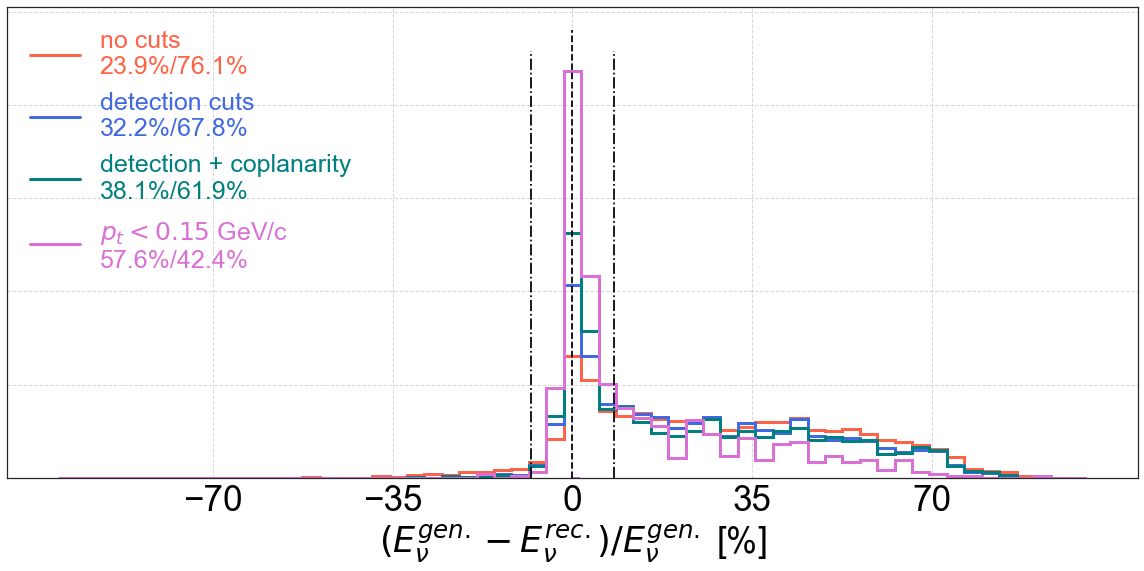

In [5]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex activity', 'delta phi' , 'tight Pt' ]                                
cut_labels = ['no cuts','detection cuts','detection + coplanarity', '$p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    fgood = find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage )
    
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,linewidth=3
             ,label=label+'\n'+'%.1f'%(100.*fgood)+'%'+'/%.1f'%(100.*(1-fgood))+'%')
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35
         ,do_add_grid=True,do_add_legend=False)
# colored legend
leg = plt.legend(fontsize=25,loc='upper left')
for text,color in zip(leg.get_texts(),cut_colors): text.set_color(color)
    
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed.pdf')

## 7.III Reconstructed pt

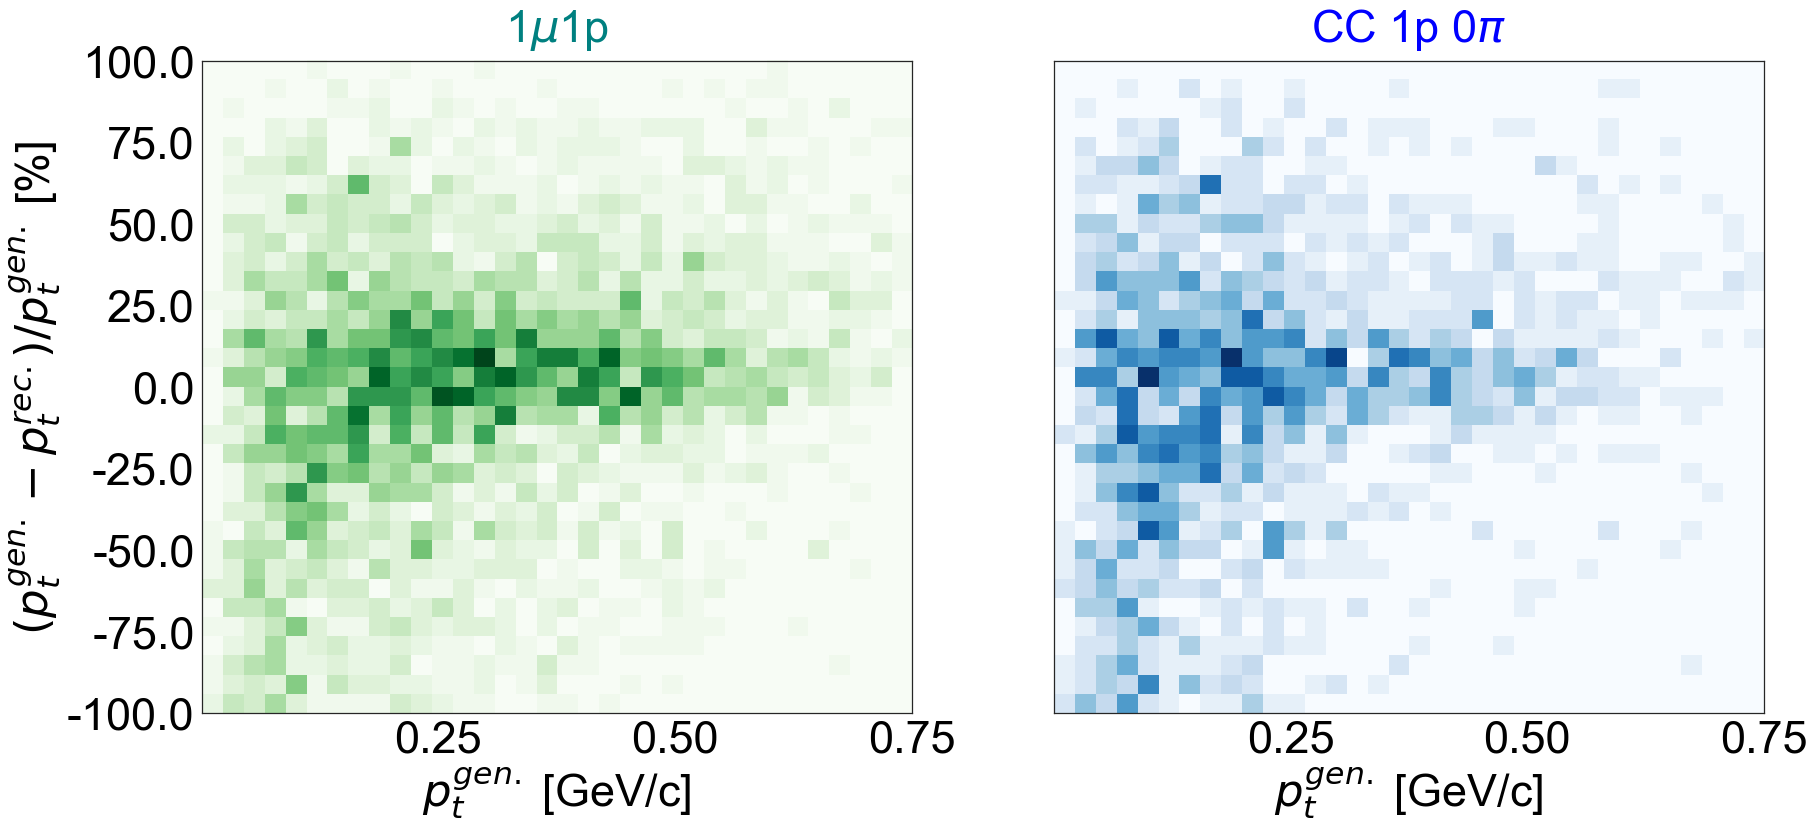

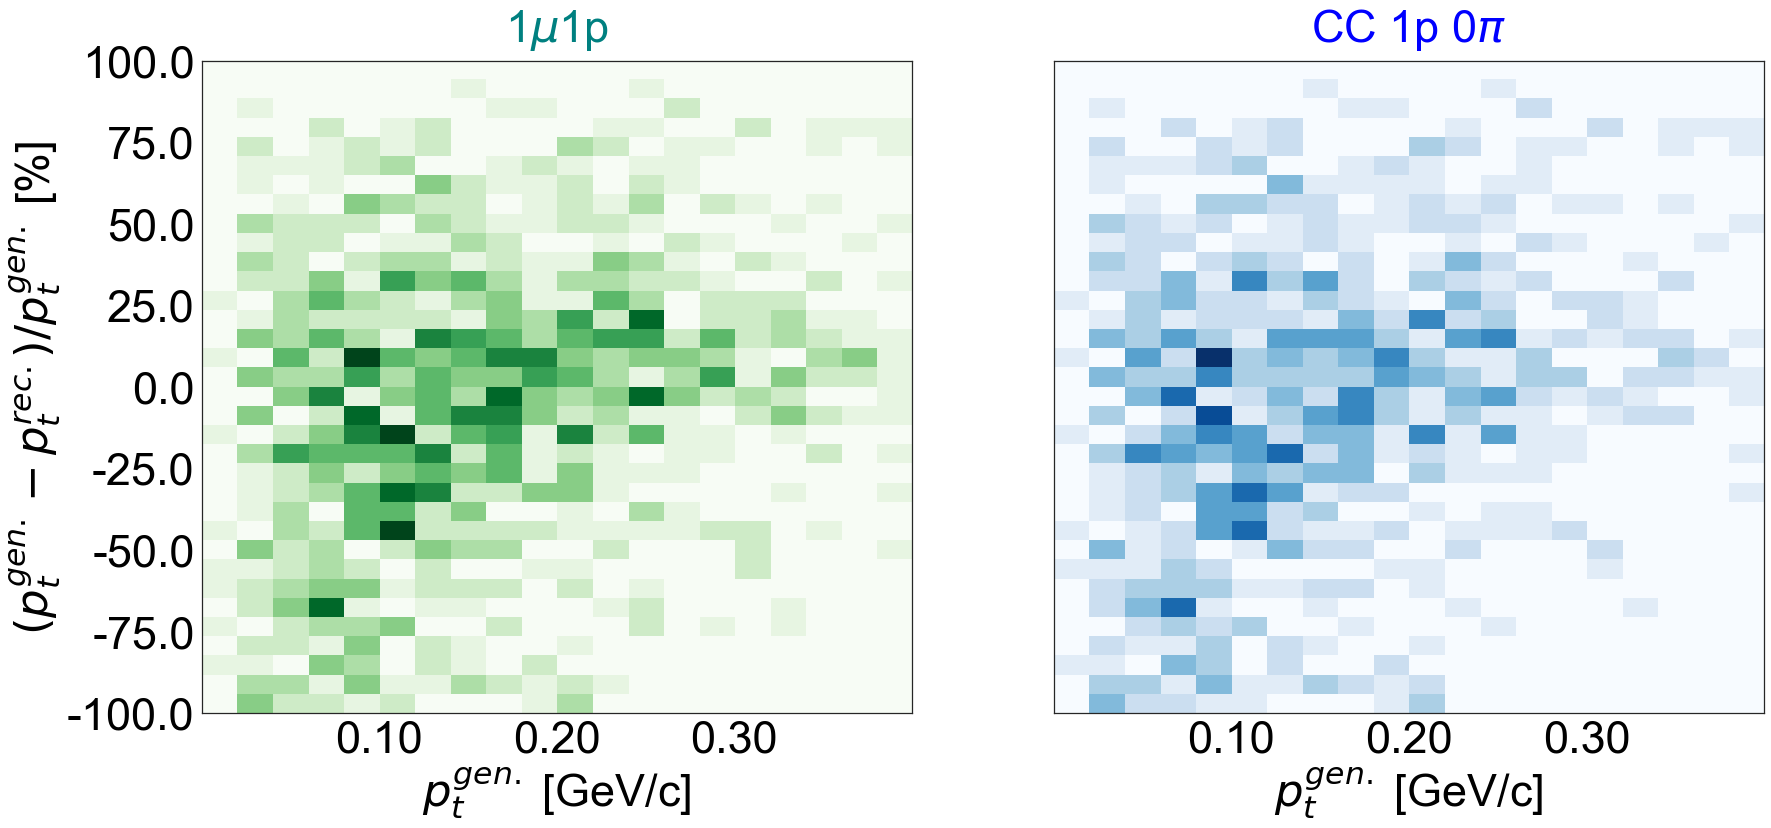

In [6]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,0.75,35),np.linspace(-100,100,35))
    
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.25,0.5,0.75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    

fig.savefig(figures_path+'Pt_reconstruction.pdf')

bins=(np.linspace(0,0.4,21),np.linspace(-100,100,35))
fig = plt.figure(figsize=(28,12))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.1,0.2,0.3])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'Pt_reconstruction_after_cut_DeltaPhi.pdf')

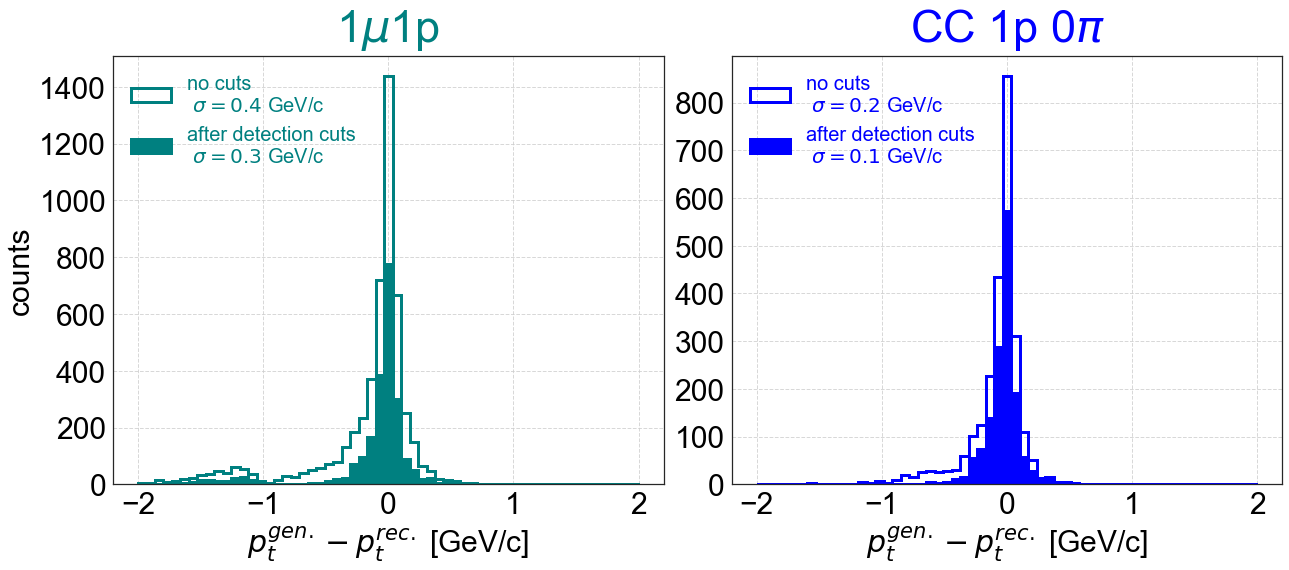

In [7]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type,label,cmap,color = get_pair_hpars(index)
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)

    for cut_name,label in zip(['no cut','vertex activity']
                                  ,['no cuts','after detection cuts']):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]                    
        delta = sample['truth_Pt']-sample['reco_Pt']
        small_sample = sample[np.abs(sample['truth_Pt']-sample['reco_Pt'])<2]
        delta_small_sample = small_sample['truth_Pt']-small_sample['reco_Pt']
        sigma = np.std(delta_small_sample)
        h,bins,_=ax.hist(delta,bins=np.linspace(-2,2,60)
                             ,histtype='step' if cut_name=='no cut' else 'stepfilled'
                             ,color=color
                             ,edgecolor=color
                             ,linewidth=3
                             ,label = label + '\n'+ r' $\sigma=%.1f$'%sigma+' GeV/c')                
        set_axes(ax,r'$p_t^{gen.}-p_t^{rec.}$ [GeV/c]' , 'counts' if i==0 else ''
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-2,-1,0,1,2]
                )    
        leg = plt.legend(fontsize=20,loc='upper left')
        for text in leg.get_texts():
            text.set_color(color)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco.pdf')

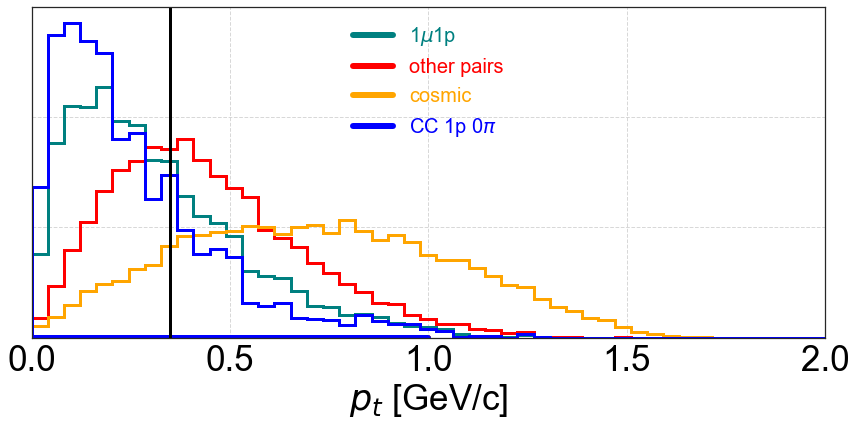

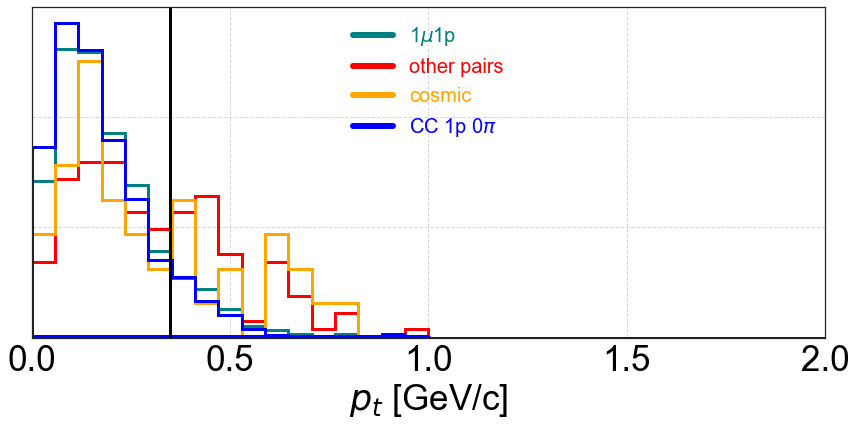

In [8]:
ax=plot_feature_pairs(cut_name='no cut',var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,50)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.savefig(figures_path+'Pt.pdf')

# after cut 5
ax=plot_feature_pairs(cut_name='delta phi',var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,35)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
plt.tight_layout()
plt.savefig(figures_path+'Pt_after_cut_DeltaPhi.pdf')

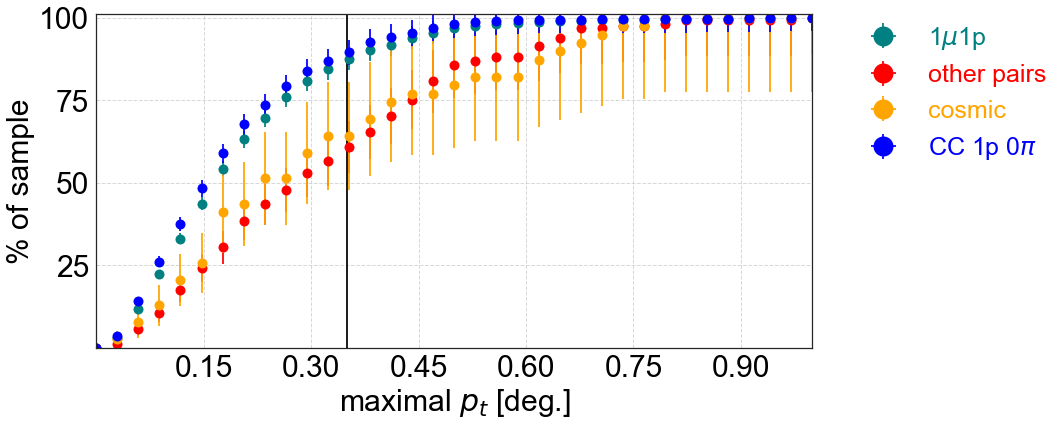

In [9]:
ax,leg=plot_cut_samples(reduced_cut_name='delta phi',do_add_legend=True,legend_fontsize=25,markers_size=10               
                     ,cut_var ='reco_Pt', cut_type= 'max',ticks_color='black'                 
                     ,x_label = 'maximal $p_{t}$ [deg.]'
                     ,xmin=0, xmax=1. , Nbins=35,fontsize=30,figsize=(12,6));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.set_xticks([0.15,0.3,0.45,0.6,0.75,0.9])
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

### E$\nu$ in bins of $p_t$ 

In [10]:

bins_labels = ['$p_{t}<0.15$ GeV/c','$0.15<p_{t}<0.25$ GeV/c','$0.25$ GeV/c $<p_{t}$']
bins_colors = ['tomato','royalblue','teal']



45.0 % with ratio< 8 %
22.5 % with ratio< 8 %
14.8 % with ratio< 8 %


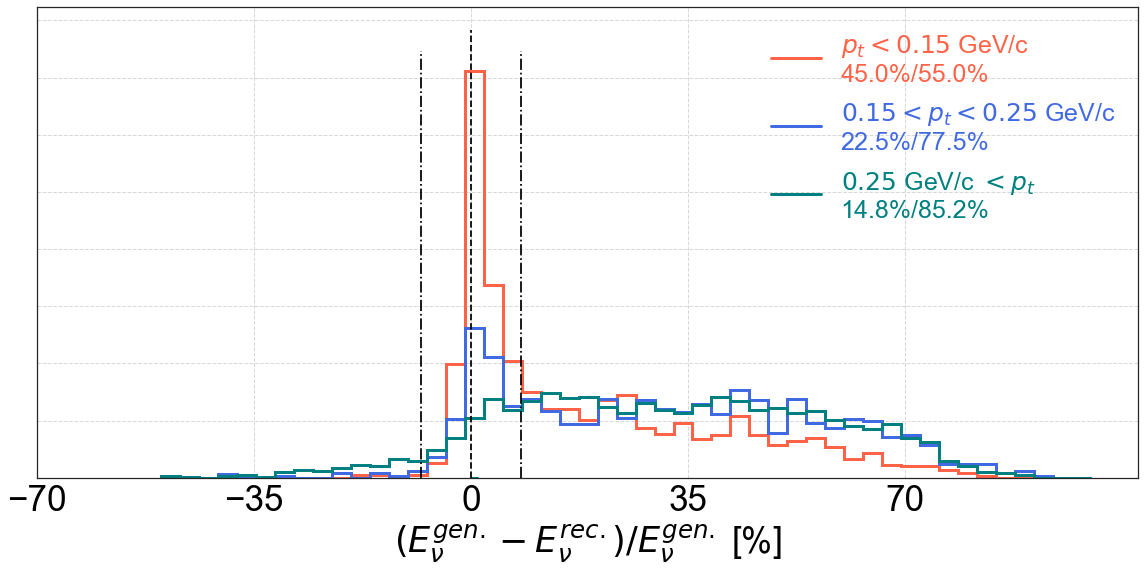

In [11]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_MCbnbDATAcosmicSamples['no cut']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' \n'+text,linewidth=3)
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=25,loc='upper right')
for text,color in zip(leg.get_texts(),bins_colors): text.set_color(color)

ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt.pdf')

57.6 % with ratio< 8 %
30.6 % with ratio< 8 %
13.7 % with ratio< 8 %


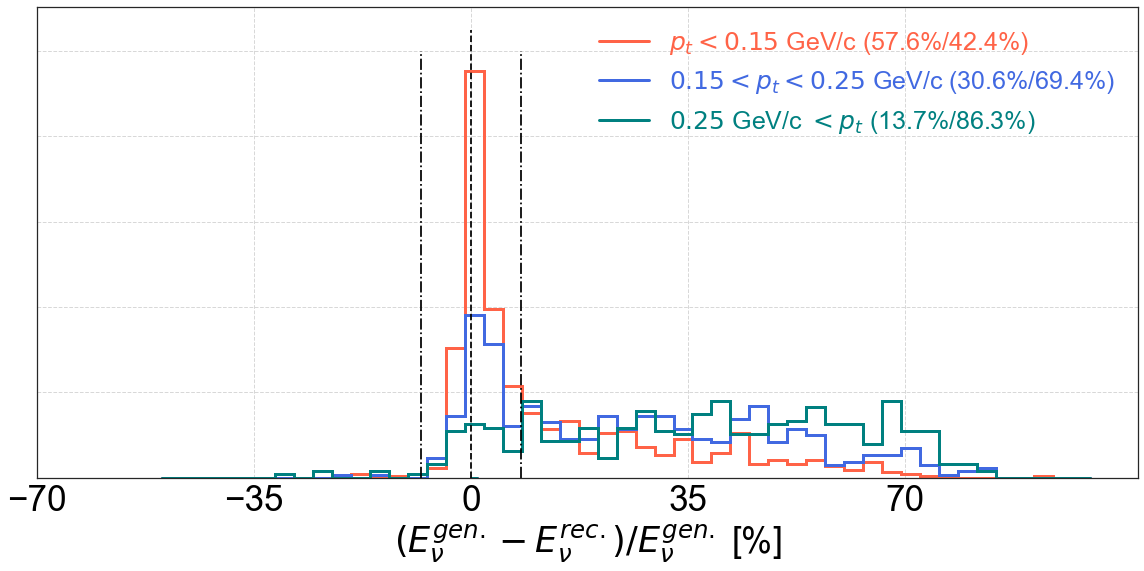

In [12]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_MCbnbDATAcosmicSamples['delta phi']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']    
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' ('+text+')',linewidth=3)
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)

plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=25,loc='upper right')
for text,color in zip(leg.get_texts(),bins_colors): text.set_color(color)


ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt_after_cut_DeltaPhi.pdf')

### 7.IV A tight cut on pt for better reconstructed Eν

In [13]:
pureff_MCbnbDATAcosmic_numbers

,\CCIpOpi,\mup,cosmic,cut label,cut name,eff \CCIpOpi,eff \mup,other pairs,pur \CCIpOpi,pur \mup
no cut,2518.0,5094.0,9525.0,no cut,no cut,100.000000,100.000000,4360.0,13.267295,26.840192
PIDa,2194.0,4487.0,1584.0,${PID}_a>12$,PIDa,87.132645,88.084020,2526.0,25.520530,52.192625
flashes,2185.0,4468.0,1166.0,$N_{flashes}>0$,flashes,86.775218,87.711033,2518.0,26.803238,54.808636
flash,2060.0,4218.0,757.0,optical filter,flash,81.810961,82.803298,2431.0,27.815285,56.953821
length,1799.0,3487.0,416.0,$l_{\mu}>l_{p}$,length,71.445592,68.453082,1344.0,34.286259,66.457023
non-collinearity,1709.0,3213.0,242.0,"$|\theta_{1,2}-90^0|<60^0$",non-collinearity,67.871326,63.074205,1042.0,38.003113,71.447632
vertex activity,1473.0,2192.0,124.0,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",vertex activity,58.498809,43.031017,605.0,50.427936,75.042794
delta phi,1167.0,1531.0,39.0,$|\Delta \phi - \pi|<40^0$,delta phi,46.346307,30.054967,161.0,67.417678,88.445985
Pt no Delta phi,1209.0,1654.0,55.0,$p_{t}<0.35$ GeV/c,Pt no Delta phi,48.014297,32.469572,278.0,60.845496,83.241067
soft Pt,1044.0,1333.0,25.0,$p_{t}<0.35$ GeV/c,soft Pt,41.461477,26.168041,98.0,71.703297,91.552198


In [14]:
# plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)
print " plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)"
print 
print "			\hline"
print "			cut	 					& \\textcolor{orange}{cosmic}		& \\textcolor{red}{other pairs} 		& \\textcolor{teal}{\mup} 		& \\textcolor{blue}{\CCIpOpi}  			& purity \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 	& efficiency \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 		\\tabularnewline"
print "\hline \hline"
for i,row in pureff_MCbnbDATAcosmic_numbers.iterrows():
    if "theta_{pq}" in row['cut name'] or "p_{t}" in row['cut name']:
        print "			"+row['cut name']+"\
        & \\textcolor{orange}{%d"%row['cosmic']+"}\
        & \\textcolor{red}{%d"%row['other pairs']+"}\
        & \\textcolor{teal}{%d"%row['\mup']+"}\
        & \\textcolor{blue}{%d"%row['\CCIpOpi']+"}\
        & \\textcolor{teal}{%.1f"%(float(row['pur \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['pur \CCIpOpi']))+"\%"+")}\
        & \\textcolor{teal}{%.1f"%(float(row['eff \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['eff \CCIpOpi']))+"\%"+")}\
        \\tabularnewline"
        print "\hline"
print
print

 plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)

			\hline
			cut	 					& \textcolor{orange}{cosmic}		& \textcolor{red}{other pairs} 		& \textcolor{teal}{\mup} 		& \textcolor{blue}{\CCIpOpi}  			& purity \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 	& efficiency \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 		\tabularnewline
\hline \hline




## Following Andy' Comment - reconstruction of $E_\nu$ using information from the lepton only

$ E_\nu = \frac{2M_n^* E_\mu - ( (M_n^*)^2 +m_\mu^2 - M_p^2)}{ 2[(M_n^*) -E_\mu + p_\mu \cos \theta_\mu ]} $
### where
$ M_n^* = M_n - E_B =  M_n - (34\pm 8)$  MeV/c^2

In [15]:
m_mu = 0.1056
M_p = 0.938
M_n = 0.939
E_B = 0.034 # +/- 0.008
M_n_star = M_n - E_B

9.4 % with ratio< 8 %


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


13.5 % with ratio< 8 %
15.4 % with ratio< 8 %
26.4 % with ratio< 8 %


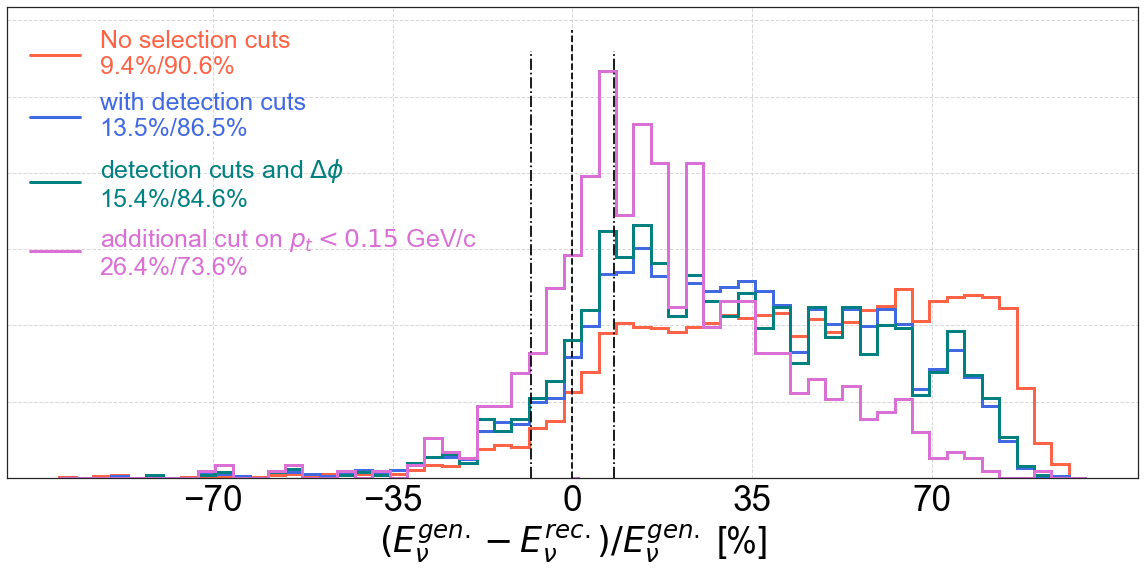

In [16]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex activity', 'delta phi' , 'tight Pt' ]                                
cut_labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
        
    sample['reco_Emu'] = np.sqrt( np.square(m_mu) + np.square(sample['reco_Pmu']) )
    numerator =  2*M_n_star*sample['reco_Emu'] - ( np.square(M_n_star) + np.square(m_mu) - np.square(M_p) )
    denominator = 2*( M_n_star - sample['reco_Emu'] + sample['reco_Pmu']*np.cos(sample['reco_Pmu_theta']))
    sample['reco_Ev_from_mu'] = numerator/denominator

    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev_from_mu'])/sample['closest_genie_Ev']
    fgood = find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage )
    
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label+'\n'+'%.1f'%(100.*fgood)+'%'+'/%.1f'%(100.*(1-fgood))+'%',linewidth=3)

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)

plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=25,loc='upper left')
for text,color in zip(leg.get_texts(),cut_colors): text.set_color(color)

ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed_from_muon.pdf')